In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import math
from collections import Counter

In [42]:
# Import data frame with resume data.
resumes = pd.read_csv('resume_with_feature.csv')
resumes.head()

,Unnamed: 0,candidate_name,job_title,jobs,qualification_info,job_category,employers,current_employers,skills
0,0,Garth Alben,exports administrator,"Assistant, Consultant, Microsoft",NaN,Other,"Candidate, Mpc consultant name, Candidate name...",NaN,"Customer Service , Customer Satisfaction , ..."
1,1,Gabrielle Van der Merwe,exports administrator,"Consultant, Administrator, Assistant, Sales ma...",NaN,Other,"Candidate, Mpc consultant name, Mpc consultant...",NaN,"Administration , Business Intelligence , Bu..."
2,2,Annatjie Kotze,exports administrator,"Assistant, Consultant, Owner, Business owner, ...",NaN,Other,"Candidate, Mpc consultant name, Candidate name...",NaN,"3rd Party , Administration , Customer Servi..."
3,3,Olivia Roberts,exports administrator,"Consultant, Assistant, Administrator, Microsof...",NaN,Other,"Candidate, Mpc consultant name, Candidate name...",NaN,"Administration , Communication , English , ..."
4,4,Fozia Dalwai,exports administrator,"Consultant, Administrator, Sap, Microsoft, Mem...",NaN,Other,"Candidate, Mpc consultant name, Candidate name...","Src representative, Microsoft po, Microsoft excel","Administration , Banking , Business Process..."


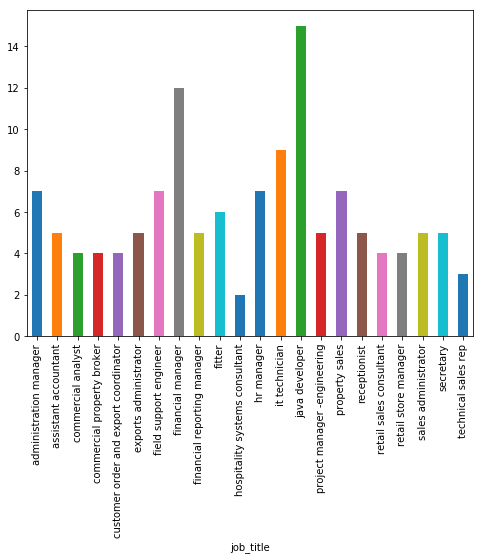

In [43]:
# Visualize the number of candidates per job title.
fig = plt.figure(figsize=(8,6))
resumes.groupby('job_title').job_title.count().plot.bar(ylim=0)
plt.show()

In [44]:
# Import job description data
desc = pd.read_csv('descriptions.csv', usecols=['job_title', 'skills'])
desc

,job_title,skills
0,exports administrator,"Administration , Communication , Marketing ..."
1,retail sales consultant,"Retail , Sales , Advantage , Art , BASIC ..."
2,financial reporting manager,"Financial Reporting , Management , Ability ..."
3,secretary,"Administration , Sales , Administration , ..."
4,receptionist,"Hospitality Management , Management , Time ..."
5,commercial analyst,"C , Management , Project Management , Adho..."
6,financial manager,"Finance , Financial Planning , Leadership ,..."
7,java developer,"Accounting , Communication , Databases , H..."
8,assistant accountant,"Management , Sales , Accounts , Accounts P..."
9,property sales,"Communication , Sales , Training , A , Ad..."


In [45]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)


def get_result(content_a, content_b):
    text1 = content_a
    text2 = content_b

    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    cosine_result = get_cosine(vector1, vector2)
    return cosine_result

In [47]:
resumes[resumes.job_title == 'administration manager']

,Unnamed: 0,candidate_name,job_title,jobs,qualification_info,job_category,employers,current_employers,skills
106,106,Ardiela Dramat,administration manager,"Administrator, Consultant, Manager, Operations...","CIDB, Health & Safety, etc., Renewals & Mainta...",Other,"Candidate, Mpc consultant name, Candidate name...",NaN,"Accounting , Administration , Customer Serv..."
107,107,Joan Nicolene Esterhuizen,administration manager,"Consultant, Administrator, Sap, Manager, Opera...",NaN,Other,"Mpc consultant name, Candidate name, Candidate...",NaN,"3rd Party , Accounting , C , English , Ma..."
108,108,Rozina Scheepers,administration manager,"Administrator, Consultant, Manager, Assistant,...",NaN,Other,"Rozina scheepers, Candidate, Mpc consultant na...",NaN,"Customer Service , Customer Satisfaction , ..."
109,109,Jeanine Adant,administration manager,"Manager, Consultant, Operations, Assistant, As...",NaN,Other,"Candidate, Jeanine adant, Mpc consultant name,...","Representative, Furniture, Client","Customer Service , Customer Satisfaction , ..."
110,110,Surelda Schlebusch,administration manager,"Consultant, Business development, Manager, Sen...",NaN,Business analytics,"Mpc consultant name, Candidate name, Mpc consu...",NaN,"Administration , Business Development , Ban..."
111,111,Sonja Krog,administration manager,"Manager, Consultant, Administrator, Sap, Opera...",NaN,Other,"Candidate, Mpc consultant name, Sonja krog, Ca...",NaN,"Administration , Banking , Customer Service..."
112,112,Samantha Jennings,administration manager,"Consultant, Manager, Assistant, Microsoft, Int...",NaN,Other,"Candidate, Samantha jennings, Candidate name, ...",NaN,"Administration , C , English , Employee Re..."


In [55]:
print (get_result(resumes['skills'][106], desc['skills'][16]))

0.361569209028


16     Administration ,  Management ,  Sales ,  Trai...
Name: skills, dtype: object

In [ ]:
i = 0
for job in resumes['job_title']:
    previous_job = ""
    results = []
    ids = []
    
    if job == previous:
        result = get_result(resumes['skills'][i], desc.skills[desc.job_title == job])
        results.append(result)
    else:
        previous_job = job
    i+=1